In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
!pip install matplotlib==3.1.3

In [3]:
def check_norm(a):
  stat, p = shapiro(a)
  if p>0.05:
    print(p, 'Fail to reject H0, It looks like Normal distribution')
  else:
    print(p, 'Reject H0, It is not like Normal distribution')

In [4]:
#Import dataset and delete all na values
dataset = pd.read_csv('/content/gdrive/MyDrive/Datasets/Smart_Health/apnea-ecg dataset.csv')
dataset.dropna(inplace=True)
dataset.head()

,Record,Length,non-apn,apnea,hours,AI,HI,AHI,Age,Sex,height,weight
1,a01,490.0,20.0,470.0,9.0,12.5,57.1,69.6,51.0,M,175.0,102.0
2,a02,529.0,109.0,420.0,9.0,57.2,12.3,69.5,38.0,M,180.0,120.0
3,a03,520.0,274.0,246.0,9.0,38.4,0.7,39.1,54.0,M,168.0,80.0
4,a04,493.0,40.0,453.0,9.0,73.4,4.0,77.4,52.0,M,173.0,121.0
5,a05,455.0,179.0,276.0,8.0,35.0,6.0,41.0,58.0,M,176.0,78.0


In [5]:
## Split 2 dataset, healthy and apnea by the condition of AHI
healthy= dataset[dataset['AHI']<= 5]
apnea= dataset[dataset['AHI'] > 5]
## Print out some descriptive statistical
print(healthy.describe())
print(apnea.describe())

           Length    non-apn      apnea  ...       Age      height      weight
count   25.000000   25.00000  25.000000  ...  25.00000   25.000000   25.000000
mean   465.640000  460.20000   5.440000  ...  35.44000  175.400000   70.840000
std     27.353976   32.30454  11.814821  ...   7.80534    8.025999   20.862007
min    401.000000  377.00000   0.000000  ...  27.00000  158.000000   53.000000
25%    454.000000  450.00000   0.000000  ...  28.00000  170.000000   63.000000
50%    469.000000  467.00000   1.000000  ...  31.00000  180.000000   65.000000
75%    483.000000  481.00000   4.000000  ...  41.00000  180.000000   72.000000
max    535.000000  535.00000  57.000000  ...  52.00000  184.000000  135.000000

[8 rows x 10 columns]
           Length     non-apn       apnea  ...        Age      height      weight
count   45.000000   45.000000   45.000000  ...  45.000000   45.000000   45.000000
mean   506.377778  219.044444  287.333333  ...  50.533333  176.088889   95.600000
std     23.436848  1

(array([5., 9., 5., 9., 2., 3., 2., 5., 4., 1.]),
 array([10.  , 18.35, 26.7 , 35.05, 43.4 , 51.75, 60.1 , 68.45, 76.8 ,
        85.15, 93.5 ]),
 <a list of 10 Patch objects>)

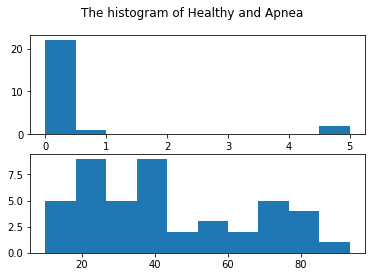

In [6]:
## Plot figures to see how distributed of those 2 group by AHI value
fig, axs = plt.subplots(2,1)
fig.suptitle('The histogram of Healthy and Apnea')
axs[0].hist(healthy['AHI'])
axs[1].hist(apnea['AHI'])

{'boxes': [<matplotlib.lines.Line2D at 0x7faa7acbac10>],
 'caps': [<matplotlib.lines.Line2D at 0x7faa7acbabd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faa7acccd50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7faa7acd4c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7faa7accc7d0>,
  <matplotlib.lines.Line2D at 0x7faa7accccd0>]}

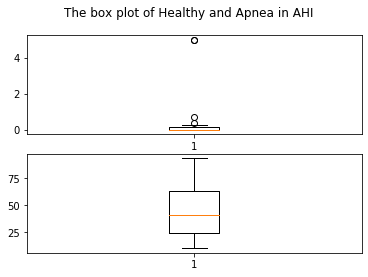

In [7]:
## Plot boxplot 
fig, axs = plt.subplots(2,1)
fig.suptitle('The box plot of Healthy and Apnea in AHI')
axs[0].boxplot(healthy['AHI'])
axs[1].boxplot(apnea['AHI'])

It seems from the histogram, both healthy and apnea are not normality, with the boxplot, we can see the healthy class having more outliers

In [8]:
## Check by look at the order of mean and median in each of class
if np.mean(healthy['AHI']) < np.median(healthy['AHI']):
  print('Class healthy has the distribution that Skewed to the left')
else:
  print('Class healthy has the distribution that Skewed to the right')

if np.mean(apnea['AHI']) < np.median(apnea['AHI']):
  print('Class apnea has the distribution that Skewed to the left')
else:
  print('Class apnea has the distribution that Skewed to the right')
## Make a shapiro test to check normality
check_norm(healthy['AHI'])
check_norm(apnea['AHI'])

Class healthy has the distribution that Skewed to the right
Class apnea has the distribution that Skewed to the right
2.8768925020017377e-09 Reject H0, It is not like Normal distribution
0.01770780049264431 Reject H0, It is not like Normal distribution


In [9]:
## Since it is not have normal distribution, we need to use Mann-Whitney U Test
stat, p = mannwhitneyu(healthy['AHI'],apnea['AHI'])
print('p-value: ',p)
if p>0.05:
  print('There is not enough evidence to reject H0, there is no difference between the groups')
else:
  print('There is significant evidence to reject H0, there is difference between the groups')

p-value:  1.9681570698806845e-12
There is significant evidence to reject H0, there is difference between the groups
